<a href="https://colab.research.google.com/github/RostislavB74/DS_HW5_1/blob/main/dz7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163000 sha256=2b3463e7dc47cb1ea0e8f94d9cac5a83e55fc01fd84ba4028ac95b8a84b81479
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, SVDpp, NMF
from surprise import SVD
from surprise import Dataset

In [4]:

from surprise.model_selection import cross_validate

data = Dataset.load_builtin('ml-100k', prompt=False)


Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


Опис архіву  
===============================================



In [ ]:
# MovieLens набори даних були зібрані дослідницьким проектом GroupLens
# в Університеті Міннесоти.

# Цей набір даних складається з:
# 	* 100 000 оцінок (1-5) від 943 користувачів для 1682 фільмів.
# 	* Кожен користувач оцінив щонайменше 20 фільмів.
#         * Проста демографічна інформація для користувачів (вік, стать, професія, поштовий індекс)

# Дані збиралися через веб-сайт MovieLens
# (movielens.umn.edu) протягом семимісячного періоду з 19 вересня
# 1997 року по 22 квітня 1998 року. дані очищено - користувачів
# , які мали менше 20 оцінок або не мали повної демографічної
# інформації, було видалено з цього набору даних. Детальний опис
# файлу даних можна знайти в кінці цього файлу.

# Ні Університет Міннесоти, ні будь-хто із
# залучених дослідників не може гарантувати правильність даних, їх придатність
# для будь-якої конкретної мети або достовірність результатів, заснованих на
# використанні набору даних. Набір даних можна використовувати для будь-яких дослідницьких
# цілей за таких умов:

#      * Користувач не має права заявляти чи натякати на будь-яке схвалення Університету
#        Міннесоти чи дослідницької групи GroupLens.

#      * Користувач повинен підтвердити використання набору даних у
#        публікаціях, отриманих у результаті використання набору даних
#        (див. інформацію про цитування нижче).

#      * Користувач не може перерозповсюджувати дані без окремого
#        дозволу.

#      * Користувачеві забороняється використовувати цю інформацію в будь-яких комерційних
#        цілях або для отримання прибутку без попереднього отримання дозволу
#        від викладача дослідницького проекту GroupLens в Університеті
#        Міннесоти.

# Якщо у вас є додаткові запитання чи коментарі, зв’яжіться з GroupLens
# <grouplens-info@cs.umn.edu>.

# CITATION
# ===============================================

# Для підтвердження використання набору даних у публікаціях, будь ласка, процитуйте таку
# статтю:

# Ф. Максвелл Харпер і Джозеф А. Констан. 2015. Набори даних MovieLens:
# історія та контекст. Транзакції ACM щодо інтерактивних інтелектуальних
# систем (TiiS) 5, 4, стаття 19 (грудень 2015), 19 сторінок.
# DOI=http://dx.doi.org/10.1145/2827872

# ПОДЯКА
# =================================== ============

# Дякую Елу Борчерсу за очищення цих даних і написання
# супровідних сценаріїв.

# ПУБЛІКОВАНА РОБОТА, ЯКА ВИКОРИСТОВУВАЛА ЦЕЙ НАБІР ДАНИХ
# ============================================= ===

# Херлокер, Дж., Констан, Дж., Борчерс, А., Рідл, Дж.. Алгоритмічна
# структура для виконання спільної фільтрації. Матеріали
# конференції 1999 року з досліджень і розробок у
# сфері пошуку інформації. Серпень 1999 р.

# ДОДАТКА ІНФОРМАЦІЯ ПРО ПРОЕКТ ДОСЛІДЖЕННЯ GROUPLENS
# ========================================== =======

# Дослідницький проект GroupLens є дослідницькою групою Департаменту
# комп’ютерних наук та інженерії Університету Міннесоти.
# Члени дослідницького проекту GroupLens беруть участь у багатьох
# дослідницьких проектах, пов’язаних із фільтрацією інформації,
# спільною фільтрацією та системами рекомендацій. Керують проектом
# професори Джон Рідл і Джозеф Констан. Проект почав
# досліджувати автоматизовану спільну фільтрацію в 1992 році, але найбільш
# відомий своїм всесвітнім випробуванням автоматизованої спільної
# системи фільтрації для новин Usenet у 1996 році. Технологія, розроблена під час
# випробування Usenet, лягла в основу формування мережевого сприйняття,
# Inc., яка була заснована членами GroupLens Research. З тих пір
# проект розширив свою сферу дослідження загальних
# рішень фільтрації інформації, інтегруючи методи на основі контенту, а також
# вдосконалюючи поточну технологію спільної фільтрації.

# Додаткову інформацію про проект GroupLens Research, включно з
# дослідницькими публікаціями, можна знайти на веб-сайті:

#         http://www.grouplens.org/

# GroupLens Research наразі працює з рекомендацією фільмів на основі
# спільної фільтрації:

#         http://www.movielens .org/

# ДЕТАЛЬНИЙ ОПИС ФАЙЛОВ ДАНИХ
# ============================================ ====

# Ось короткий опис даних.

# ml-data.tar.gz -- Стиснутий файл tar. Щоб відновити файли даних u, виконайте наступне:
#                 gunzip ml-data.tar.gz
#                 tar xvf ml-data.tar
#                 mku.sh

# u.data -- Повний набір даних u, 100 000 оцінок від 943 користувачів для 1682 елементів.
#               Кожен користувач оцінив не менше 20 фільмів. Користувачі та елементи
#               нумеруються послідовно від 1. Дані впорядковуються випадковим чином
#               . Це розділений вкладками список
# 	         ідентифікаторів користувачів | ідентифікатор товару | рейтинг | позначка часу.
#               Часові позначки є секундами Unix з 1/1/1970 UTC

# u.info -- кількість користувачів, елементів і оцінок у наборі даних u.

# u.item -- Інформація про елементи (фільми); це розділений вкладками
#               список
#               ідентифікатор фільму | назва фільму | Дата випуску | дата випуску відео |
#               IMDb URL | невідомий | Дія | Пригода | Анімація |
#               Дитячий | Комедія | Злочин | Документальний | Драма | Фантазія |
#               Фільм Нуар | Жах | Музичний | Таємниця | Романтика | Наукова фантастика |
#               Трилер | Війна | Західний |
#               Останні 19 полів — це жанри, 1 означає, що фільм
#               належить до цього жанру, 0 — ні; фільми можуть бути в
#               кількох жанрах одночасно.
#               Ідентифікатори фільмів використовуються в наборі даних u.data.

# u.genre -- список жанрів.

# u.user -- Демографічна інформація про користувачів; це
#               розділений вкладками список
#               ідентифікаторів користувачів | вік | стать | професія | поштовий індекс
#               Ідентифікатори користувачів використовуються в наборі даних u.data.

# u.occupation -- список професій.

# u1.base – набори даних від u1.base і u1.test до u5.base і u5.test
# u1.test є 80%/20% поділом даних u на навчальні та тестові дані.
# u2.base Кожен з u1, ..., u5 має непересічні тестові набори; це якщо для
# u2.test 5-кратна перехресна перевірка (де ви повторюєте свій експеримент
# u3.base з кожним навчальним і тестовим набором і усереднюєте результати).
# u3.test Ці набори даних можуть бути згенеровані з u.data mku.sh.
# u4.base
# u4.test
# u5.base
# u5.test

# ua.base -- набори даних ua.base, ua.test, ub.base і ub.test
# ua.test розділяють дані u на навчальний набір і тестовий встановити за допомогою
# ub.base рівно 10 оцінок на користувача в тестовому наборі. Множини
# ub.test ua.test і ub.test є непересічними. Ці набори даних можуть
#               бути згенеровані з u.data mku.sh.

# allbut.pl -- Сценарій, який генерує навчальні та тестові набори, де
#               всі рейтинги користувачів, окрім n, містяться в навчальних даних.

# mku.sh -- сценарій оболонки для генерації всіх наборів даних u з u.data.

# Інформація про датасет

# Інформація знаходиться в кулькох файлах

In [ ]:
type(data)

In [6]:
ratings_file = '/root/.surprise_data/ml-100k/ml-100k/u.data'

ratings_data = pd.read_csv(ratings_file, sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

print("Рейтинги фільмів:")
print(ratings_data.head())

Рейтинги фільмів:
   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596


u.info -- кількість користувачів, елементів і оцінок у наборі даних u.

In [7]:
info_file = '/root/.surprise_data/ml-100k/ml-100k/u.info'

info_data = pd.read_csv(info_file, sep='\t', names=['userId'])

print("кількість користувачів, елементів і оцінок у наборі даних u:")
print(info_data.head())



кількість користувачів, елементів і оцінок у наборі даних u:
           userId
0       943 users
1      1682 items
2  100000 ratings


In [9]:
file_path = '/root/.surprise_data/ml-100k/ml-100k/u.item'

# Назви стовпців у файлі
columns = [
    'movieId', 'title', 'release_date', 'video_release_date',
    'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
    'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
    'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
    'Sci-Fi', 'Thriller', 'War', 'Western'
]

movies_df = pd.read_csv(file_path, sep='|', encoding='latin-1', header=None, names=columns)

print(movies_df.head())


   movieId              title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        3  Four Rooms (1995)  01-Jan-1995                 NaN   
3        4  Get Shorty (1995)  01-Jan-1995                 NaN   
4        5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1         1  ...        0          0       0        0   
1     

In [10]:
file_path = '/root/.surprise_data/ml-100k/ml-100k/u.user'

# Назви стовпців у файлі
columns = ['userId', 'age', 'gender', 'occupation', 'zip_code']

users_df = pd.read_csv(file_path, sep='|', header=None, names=columns)

print(users_df.head())


   userId  age gender  occupation zip_code
0       1   24      M  technician    85711
1       2   53      F       other    94043
2       3   23      M      writer    32067
3       4   24      M  technician    43537
4       5   33      F       other    15213


In [16]:
genre_file = '/root/.surprise_data/ml-100k/ml-100k/u.genre'
genre_data = pd.read_csv(genre_file, sep='\t', names=['genreId'])

print("Жанри фільмів")
print(genre_data.head())



Жанри фільмів
        genreId
0     unknown|0
1      Action|1
2   Adventure|2
3   Animation|3
4  Children's|4


In [12]:
# Шлях до файлу даних про професії
file_path = '/root/.surprise_data/ml-100k/ml-100k/u.occupation'

# Зчитування файлу даних про професії
with open(file_path, 'r') as file:
    occupations = file.readlines()

# Перетворення списку рядків у список професій
occupations = [occupation.strip() for occupation in occupations]

# Виведення списку професій
print(occupations)



['administrator', 'artist', 'doctor', 'educator', 'engineer', 'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer', 'librarian', 'marketing', 'none', 'other', 'programmer', 'retired', 'salesman', 'scientist', 'student', 'technician', 'writer']


# Новый раздел

In [17]:

num_ratings = len(data.raw_ratings)
print("Кількість рейтингів:", num_ratings)


Кількість рейтингів: 100000


In [18]:
from datetime import date

dater = None

# Access dataset attributes
raw_ratings = data.raw_ratings
print("Number of ratings:", len(raw_ratings))

# Print a sample of raw ratings
print("\nTop 5 samples of raw ratings:")
for rating in raw_ratings[:5]:
  uid, iid, ur, timestamp = rating
  if timestamp:
    dater = date.fromtimestamp(int(timestamp))
  print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")

search_uid = uid
count_uid = 5
print(f"\nTop {count_uid} ratings of user: {search_uid}")

for rating in raw_ratings:
  uid, iid, ur, timestamp = rating
  if uid == search_uid:
    if timestamp:
      dater = date.fromtimestamp(int(timestamp))
    count_uid -= 1;
    print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")
    if count_uid <= 0:
      break

search_iid = iid
count_iid = 5
print(f"\nTop {count_iid} ratings of item: {search_iid}")

for rating in raw_ratings:
  uid, iid, ur, timestamp = rating
  if iid == search_iid:
    if timestamp:
      dater = date.fromtimestamp(int(timestamp))
    count_iid -= 1;
    print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, date: {dater}")
    if count_iid <= 0:
      break

Number of ratings: 100000

Top 5 samples of raw ratings:
UserID: 196  , ItemID: 242  , UserRateForItem:   3.0, date: 1997-12-04
UserID: 186  , ItemID: 302  , UserRateForItem:   3.0, date: 1998-04-04
UserID: 22   , ItemID: 377  , UserRateForItem:   1.0, date: 1997-11-07
UserID: 244  , ItemID: 51   , UserRateForItem:   2.0, date: 1997-11-27
UserID: 166  , ItemID: 346  , UserRateForItem:   1.0, date: 1998-02-02

Top 5 ratings of user: 166
UserID: 166  , ItemID: 346  , UserRateForItem:   1.0, date: 1998-02-02
UserID: 166  , ItemID: 328  , UserRateForItem:   5.0, date: 1998-02-02
UserID: 166  , ItemID: 322  , UserRateForItem:   5.0, date: 1998-02-02
UserID: 166  , ItemID: 288  , UserRateForItem:   3.0, date: 1998-02-02
UserID: 166  , ItemID: 258  , UserRateForItem:   4.0, date: 1998-02-02

Top 5 ratings of item: 258
UserID: 26   , ItemID: 258  , UserRateForItem:   3.0, date: 1998-03-31
UserID: 66   , ItemID: 258  , UserRateForItem:   4.0, date: 1997-12-31
UserID: 207  , ItemID: 258  , UserR

In [19]:
# Ініціалізуємо читача даних
reader = Reader()

# Побудуємо датасет з оцінками
dataset = data.build_full_trainset()

# Створимо список алгоритмів
algorithms = [SVD(), SVDpp(), NMF()]

# Пройдемось по кожному алгоритму та оцінимо їх за допомогою крос-валідації
for algorithm in algorithms:
    print(f"Evaluating {algorithm.__class__.__name__}...")
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=True)
    print(f"Mean RMSE for {algorithm.__class__.__name__}: {results['test_rmse'].mean()}")

Evaluating SVD...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9342  0.9372  0.9381  0.9321  0.9361  0.9355  0.0022  
Fit time          1.33    1.39    2.27    2.03    1.38    1.68    0.39    
Test time         0.14    0.12    0.40    0.12    0.12    0.18    0.11    
Mean RMSE for SVD: 0.9355409463093393
Evaluating SVDpp...
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9200  0.9155  0.9200  0.9259  0.9158  0.9194  0.0038  
Fit time          26.45   27.69   26.58   26.57   27.28   26.91   0.49    
Test time         4.50    4.24    5.13    4.31    5.19    4.67    0.41    
Mean RMSE for SVDpp: 0.9194324477424576
Evaluating NMF...
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9620  0.9606  0.9628  

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, CoClustering, BaselineOnly, NormalPredictor

# Побудуємо датасет з оцінками
dataset = data.build_full_trainset()

# Створюємо список алгоритмів
algorithms = [
    SVD(),
    SVDpp(cache_ratings=False),
    SVDpp(cache_ratings=True),
    NMF(),
    SlopeOne(),
    KNNBasic(),
    KNNWithMeans(),
    KNNWithZScore(),
    KNNBaseline(),
    CoClustering(),
    BaselineOnly(),
    NormalPredictor()
]

# Створюємо словник для збереження результатів
results = {}

# Проходимо по кожному алгоритму та вимірюємо його ефективність
for algo in algorithms:
    print(f"Evaluating {algo.__class__.__name__}...")
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mean_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
    mean_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])
    mean_time = sum(cv_results['fit_time']) / len(cv_results['fit_time'])
    results[algo.__class__.__name__] = {'RMSE': mean_rmse, 'MAE': mean_mae, 'Time': mean_time}

# Виведіть результати
for algo, metrics in results.items():
    print(f"{algo}: RMSE={metrics['RMSE']}, MAE={metrics['MAE']}, Time={metrics['Time']}")


Evaluating SVD...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9335  0.9296  0.9472  0.9322  0.9363  0.9358  0.0061  
MAE (testset)     0.7362  0.7330  0.7473  0.7343  0.7379  0.7377  0.0051  
Fit time          1.37    1.38    1.35    1.36    1.84    1.46    0.19    
Test time         0.34    0.17    0.37    0.11    0.20    0.24    0.10    
Evaluating SVDpp...
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9173  0.9119  0.9281  0.9210  0.9285  0.9213  0.0063  
MAE (testset)     0.7201  0.7112  0.7257  0.7242  0.7296  0.7222  0.0063  
Fit time          26.65   27.04   28.98   29.95   35.89   29.70   3.32    
Test time         4.52    5.07    5.12    4.11    6.76    5.11    0.90    
Evaluating SVDpp...


In [21]:
"""This module runs a 5-Fold CV for all the algorithms (default parameters) on
the movielens datasets, and reports average RMSE, MAE, and total computation
time.  It is used for making tables in the README.md file"""

# flake8: noqa

import datetime
import random
import time

import numpy as np

from surprise import (
    BaselineOnly,
    CoClustering,
    Dataset,
    KNNBaseline,
    KNNBasic,
    KNNWithMeans,
    NMF,
    NormalPredictor,
    SlopeOne,
    SVD,
    SVDpp,
)
from surprise.model_selection import cross_validate, KFold
from tabulate import tabulate

# The algorithms to cross-validate
algos = (
    SVD(random_state=0),
    SVDpp(random_state=0, cache_ratings=False),
    SVDpp(random_state=0, cache_ratings=True),
    NMF(random_state=0),
    SlopeOne(),
    KNNBasic(),
    KNNWithMeans(),
    KNNBaseline(),
    CoClustering(random_state=0),
    BaselineOnly(),
    NormalPredictor(),
)

# ugly dict to map algo names and datasets to their markdown links in the table
stable = "https://surprise.readthedocs.io/en/stable/"
LINK = {
    "SVD": "[{}]({})".format(
        "SVD",
        stable
        + "matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD",
    ),
    "SVDpp": "[{}]({})".format(
        "SVD++",
        stable
        + "matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp",
    ),
    "NMF": "[{}]({})".format(
        "NMF",
        stable
        + "matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.NMF",
    ),
    "SlopeOne": "[{}]({})".format(
        "Slope One",
        stable + "slope_one.html#surprise.prediction_algorithms.slope_one.SlopeOne",
    ),
    "KNNBasic": "[{}]({})".format(
        "k-NN",
        stable + "knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic",
    ),
    "KNNWithMeans": "[{}]({})".format(
        "Centered k-NN",
        stable + "knn_inspired.html#surprise.prediction_algorithms.knns.KNNWithMeans",
    ),
    "KNNBaseline": "[{}]({})".format(
        "k-NN Baseline",
        stable + "knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline",
    ),
    "CoClustering": "[{}]({})".format(
        "Co-Clustering",
        stable
        + "co_clustering.html#surprise.prediction_algorithms.co_clustering.CoClustering",
    ),
    "BaselineOnly": "[{}]({})".format(
        "Baseline",
        stable
        + "basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly",
    ),
    "NormalPredictor": "[{}]({})".format(
        "Random",
        stable
        + "basic_algorithms.html#surprise.prediction_algorithms.random_pred.NormalPredictor",
    ),
    "ml-100k": "[{}]({})".format(
        "Movielens 100k", "https://grouplens.org/datasets/movielens/100k"
    ),
    "ml-1m": "[{}]({})".format(
        "Movielens 1M", "https://grouplens.org/datasets/movielens/1m"
    ),
}


# set RNG
np.random.seed(0)
random.seed(0)

# dataset = "ml-100k"
# data = Dataset.load_builtin(dataset)
kf = KFold(random_state=0)  # folds will be the same for all algorithms.

table = []
for algo in algos:
    start = time.time()
    out = cross_validate(algo, data, ["rmse", "mae"], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    link = LINK[algo.__class__.__name__]
    mean_rmse = "{:.3f}".format(np.mean(out["test_rmse"]))
    mean_mae = "{:.3f}".format(np.mean(out["test_mae"]))

    new_line = [link, mean_rmse, mean_mae, cv_time]
    print(tabulate([new_line], tablefmt="pipe"))  # print current algo perf
    table.append(new_line)

header = ["Algorithm", "RMSE", "MAE", "Time"]
print(tabulate(table, header, tablefmt="pipe"))

|:-----------------------------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [SVD](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD) | 0.934 | 0.737 | 0:00:08 |
|:---------------------------------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [SVD++](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp) | 0.919 | 0.721 | 0:02:45 |
|:---------------------------------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [SVD++](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp) | 0.919 | 0.721 | 0:02:31 |
|:----------------

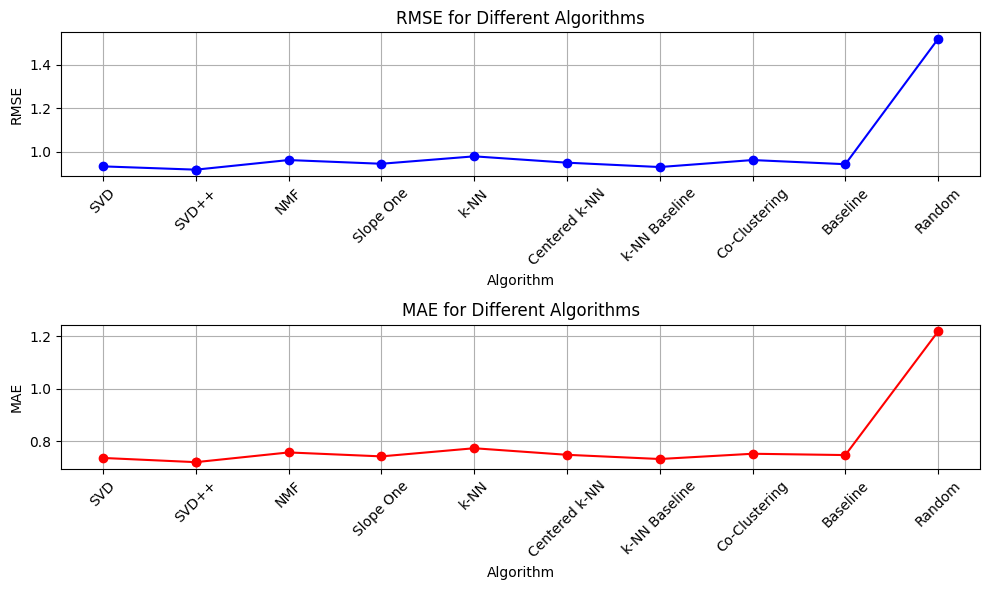

In [20]:
import matplotlib.pyplot as plt

# Дані для графіка
algorithms = ["SVD", "SVD++", "SVD++", "NMF", "Slope One", "k-NN", "Centered k-NN", "k-NN Baseline", "Co-Clustering", "Baseline", "Random"]
rmse = [0.934, 0.919, 0.919, 0.963, 0.946, 0.98, 0.951, 0.931, 0.963, 0.944, 1.518]
mae = [0.737, 0.721, 0.721, 0.758, 0.743, 0.774, 0.749, 0.733, 0.753, 0.748, 1.219]
time = [11, 160, 133, 14, 19, 21, 22, 25, 13, 4, 2]

# Побудова графіків
plt.figure(figsize=(10, 6))

# Графік RMSE
plt.subplot(2, 1, 1)
plt.plot(algorithms, rmse, marker='o', color='b')
plt.title('RMSE for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)

# Графік MAE
plt.subplot(2, 1, 2)
plt.plot(algorithms, mae, marker='o', color='r')
plt.title('MAE for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(True)

# Відображення графіків
plt.tight_layout()
plt.show()


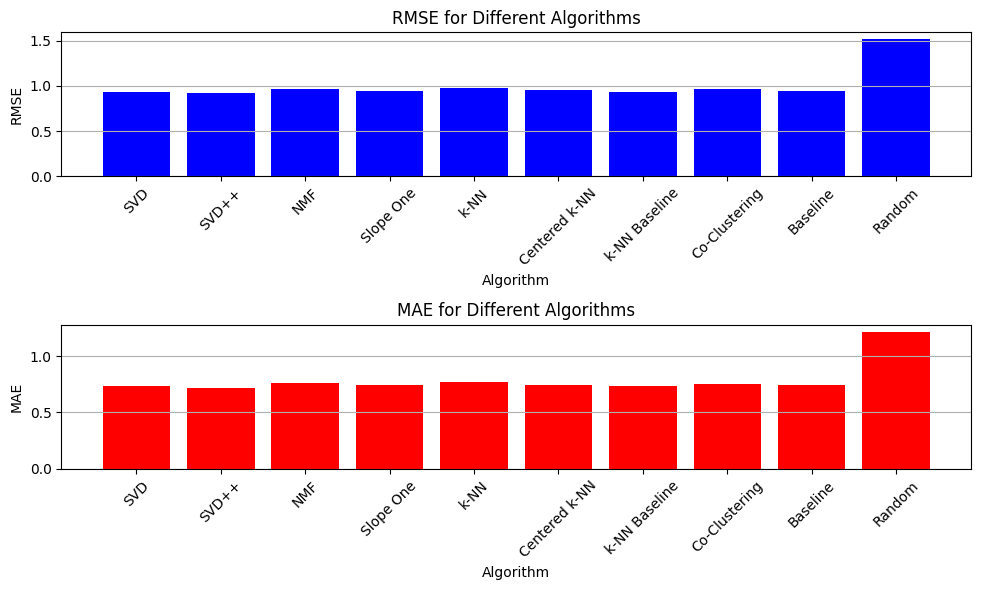

In [ ]:
import matplotlib.pyplot as plt

# Дані для графіка
algorithms = ["SVD", "SVD++", "NMF", "Slope One", "k-NN", "Centered k-NN", "k-NN Baseline", "Co-Clustering", "Baseline", "Random"]
rmse = [0.934, 0.919, 0.963, 0.946, 0.98, 0.951, 0.931, 0.963, 0.944, 1.518]
mae = [0.737, 0.721, 0.758, 0.743, 0.774, 0.749, 0.733, 0.753, 0.748, 1.219]
time = [11, 160, 14, 19, 21, 22, 25, 13, 4, 2]

# Побудова графіків
plt.figure(figsize=(10, 6))

# Діаграма гістограми для RMSE
plt.subplot(2, 1, 1)
plt.bar(algorithms, rmse, color='b')
plt.title('RMSE for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Діаграма гістограми для MAE
plt.subplot(2, 1, 2)
plt.bar(algorithms, mae, color='r')
plt.title('MAE for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Відображення графіків
plt.tight_layout()
plt.show()
